## Recipes: reading JSON data and loading it into a DataFrame

In [1]:
import pandas as pd

In [2]:
try:
    recipes = pd.read_csv('data/openrecipes.json')
except ValueError as e:
    print("ValueError:", e)

ValueError: Error tokenizing data. C error: Expected 15 fields in line 4, saw 17



In [3]:
# Each line is in JSON format but the entire file is not
# So lines needs to be stitched to produce a single JSON document of all recipes

In [6]:
with open('data/openrecipes.json') as f:
    # Extract each line and trim it
    data = (line.strip() for line in f)
    
    # Concatenate each line with a comma
    # Enclose entire string in square backets
    data_json = "[{0}]".format(','.join(data))

recipes = pd.read_json(data_json)

In [7]:
recipes.head()

,name,ingredients,url,image,cookTime,recipeYield,datePublished,prepTime,description
0,Easter Leftover Sandwich,12 whole Hard Boiled Eggs\n1/2 cup Mayonnaise\...,http://thepioneerwoman.com/cooking/2013/04/eas...,http://static.thepioneerwoman.com/cooking/file...,PT,8,2013-04-01,PT15M,Got leftover Easter eggs? Got leftover East...
1,Pasta with Pesto Cream Sauce,3/4 cups Fresh Basil Leaves\n1/2 cup Grated Pa...,http://thepioneerwoman.com/cooking/2011/06/pas...,http://static.thepioneerwoman.com/cooking/file...,PT10M,8,2011-06-06,PT6M,I finally have basil in my garden. Basil I can...
2,Herb Roasted Pork Tenderloin with Preserves,"2 whole Pork Tenderloins\n Salt And Pepper, to...",http://thepioneerwoman.com/cooking/2011/09/her...,http://static.thepioneerwoman.com/cooking/file...,PT15M,12,2011-09-15,PT5M,This was yummy. And easy. And pretty! And it t...
3,Chicken Florentine Pasta,"1 pound Penne\n4 whole Boneless, Skinless Chic...",http://thepioneerwoman.com/cooking/2012/04/chi...,http://static.thepioneerwoman.com/cooking/file...,PT20M,10,2012-04-23,PT10M,"I made this for a late lunch Saturday, and it ..."
4,Perfect Iced Coffee,"1 pound Ground Coffee (good, Rich Roast)\n8 qu...",http://thepioneerwoman.com/cooking/2011/06/per...,http://static.thepioneerwoman.com/cooking/file...,PT,24,2011-06-13,PT8H,"Iced coffee is my life. When I wake up, often ..."


In [8]:
# 1042 recipes
recipes.shape

(1042, 9)

### Read XML in Pandas

In [7]:
pip install pandas_read_xml

Note: you may need to restart the kernel to use updated packages.


In [10]:
import pandas_read_xml as pdx

In [12]:
# https://pypi.org/project/pandas-read-xml/

# You will need to identify the path to the "root" tag in the XML from which you want to extract the data.
news = pdx.read_xml("https://news.yahoo.com/rss/us", ['rss', 'channel', 'item'])

In [13]:
news.head()

,title,link,pubDate,source,guid,media:content,media:credit
0,U.S. retail sales miss expectations in October,https://news.yahoo.com/u-retail-sales-miss-exp...,2020-11-17T13:37:37Z,"{'@url': 'https://www.reuters.com/', '#text': ...","{'@isPermaLink': 'false', '#text': 'u-retail-s...","{'@height': '86', '@url': 'https://s.yimg.com/...",{'@role': 'publishing company'}
1,Spain locates 320 migrants in 10 boats off Can...,https://news.yahoo.com/spain-locates-320-migra...,2020-11-17T13:36:04Z,"{'@url': 'http://www.ap.org/', '#text': 'Assoc...","{'@isPermaLink': 'false', '#text': 'spain-loca...","{'@height': '86', '@url': 'https://s.yimg.com/...",{'@role': 'publishing company'}
2,Who are the top contenders for the Biden admin...,https://news.yahoo.com/top-contenders-biden-ad...,2020-11-17T13:25:23Z,"{'@url': 'https://www.reuters.com/', '#text': ...","{'@isPermaLink': 'false', '#text': 'top-conten...","{'@height': '86', '@url': 'https://s.yimg.com/...",{'@role': 'publishing company'}
3,Peace was swift in Ethiopia under Abiy. War wa...,https://news.yahoo.com/peace-swift-ethiopia-un...,2020-11-17T13:24:01Z,"{'@url': 'http://www.ap.org/', '#text': 'Assoc...","{'@isPermaLink': 'false', '#text': 'peace-swif...","{'@height': '86', '@url': 'https://s.yimg.com/...",{'@role': 'publishing company'}
4,CureVac hiking capacity to 300 million COVID-1...,https://news.yahoo.com/curevac-hiking-capacity...,2020-11-17T13:04:18Z,"{'@url': 'https://www.reuters.com/', '#text': ...","{'@isPermaLink': 'false', '#text': 'curevac-hi...","{'@height': '86', '@url': 'https://s.yimg.com/...",{'@role': 'publishing company'}


In [18]:
news['title'].values

news.title.values

array(['U.S. retail sales miss expectations in October',
       'Spain locates 320 migrants in 10 boats off Canary Islands',
       'Who are the top contenders for the Biden administration?',
       'Peace was swift in Ethiopia under Abiy. War was, too.',
       'CureVac hiking capacity to 300 million COVID-19 doses in 2021',
       'Congresswoman "devastated" after next-door neighbor found dead',
       'Aramark: Fiscal 4Q Earnings Snapshot',
       "Marie Stopes changes name over founder's eugenics ideas",
       'Special Report: A city takes on its police union, and a nation is watching',
       "U.S. FDA declines to approve Alkermes' schizophrenia treatment",
       'Special Report: A Black man risks all to clear his name - and expose the police',
       'U.S. farmers celebrate soy price surge as Brazil misses out',
       'Official: Europe must do more for its defense, depends on US',
       'Special Report: A cop shoots a Black man, and a police union flexes its muscle',
       '

In [15]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


### Create a word cloud of news headlines
Code adapted from https://www.mikulskibartosz.name/word-cloud-from-a-pandas-data-frame/

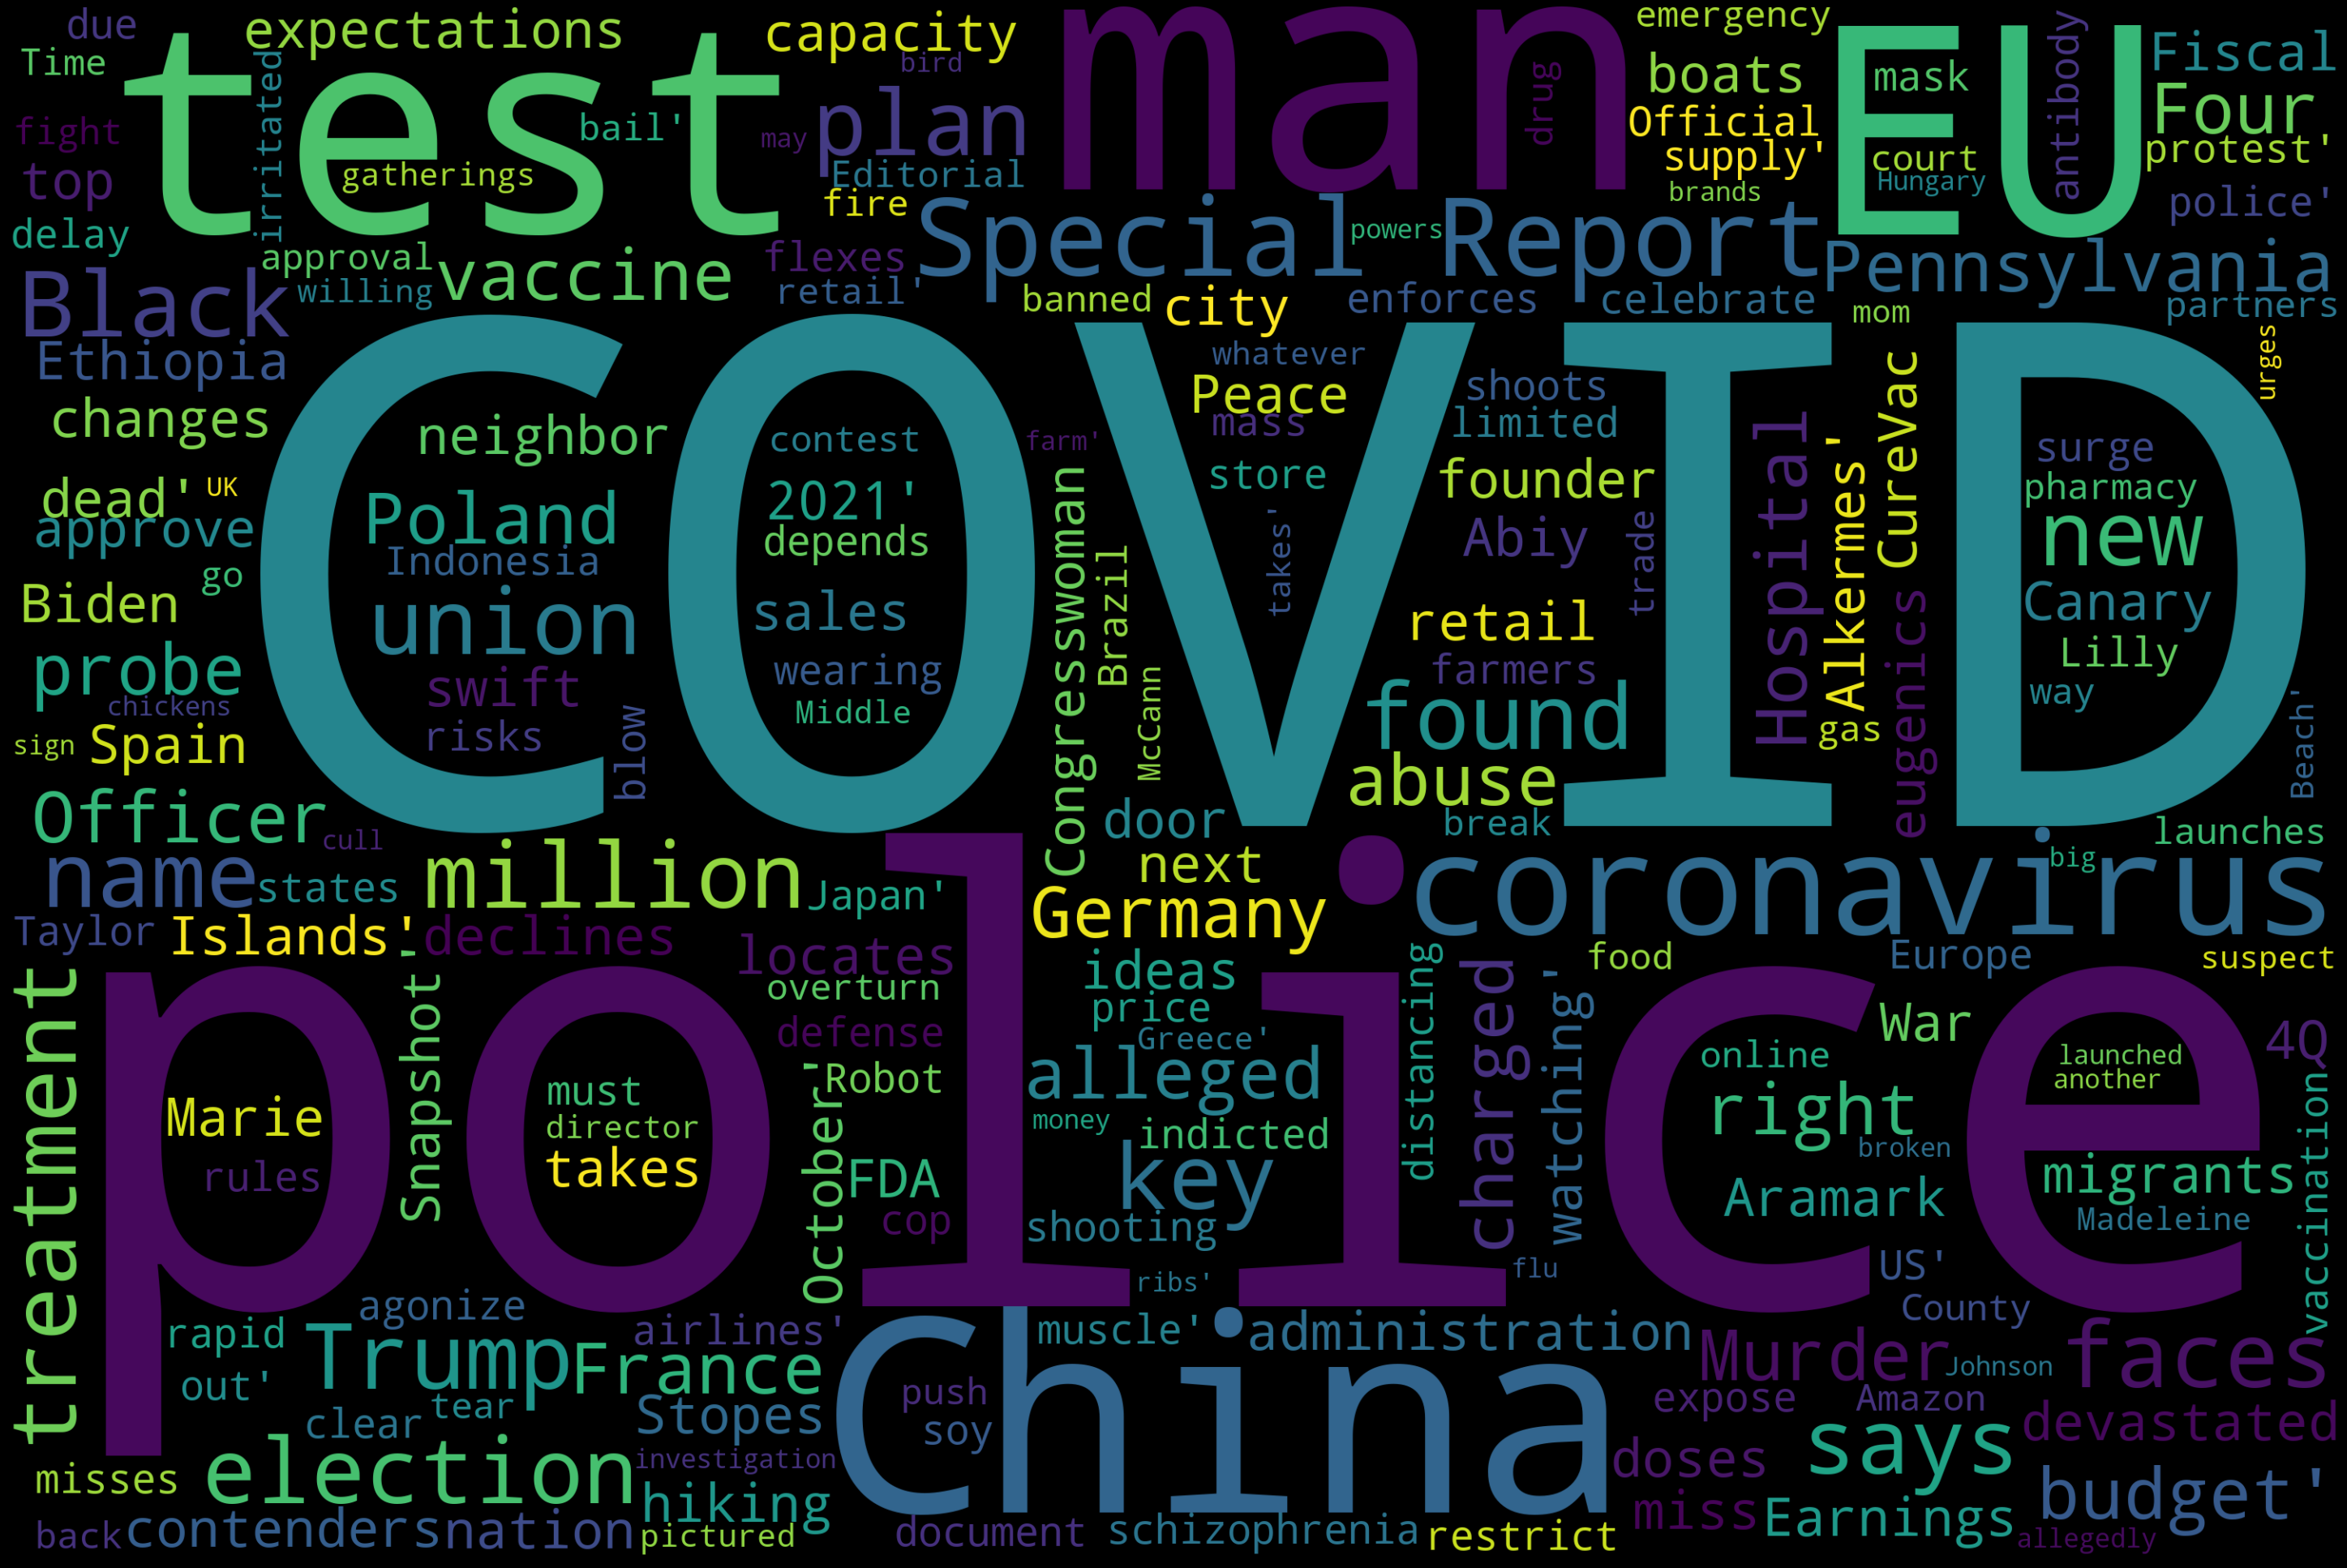

In [19]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
text = news.title.values # array
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()